_Lambda School Data Science — Big Data_

# AWS SageMaker

### Links

#### AWS
- The Open Guide to Amazon Web Services: EC2 Basics _(just this one short section!)_ https://github.com/open-guides/og-aws#ec2-basics
- AWS in Plain English https://www.expeditedssl.com/aws-in-plain-english
- Amazon SageMaker » Create an Amazon SageMaker Notebook Instance https://docs.aws.amazon.com/sagemaker/latest/dg/gs-setup-working-env.html
- Amazon SageMaker » Install External Libraries https://docs.aws.amazon.com/sagemaker/latest/dg/nbi-add-external.html 

`conda install -n python3 bokeh dask datashader fastparquet numba python-snappy`

#### Dask
- Why Dask? https://docs.dask.org/en/latest/why.html
- Use Cases https://docs.dask.org/en/latest/use-cases.html
- User Interfaces https://docs.dask.org/en/latest/user-interfaces.html

#### Numba
- A ~5 minute guide http://numba.pydata.org/numba-doc/latest/user/5minguide.html

## 1. Estimate pi
https://en.wikipedia.org/wiki/Approximations_of_π#Summing_a_circle's_area

### With plain Python

In [0]:
import random

def monte_carlo_pi(nsamples):
    acc = 0
    for _ in range(int(nsamples)):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [0]:
%%time
monte_carlo_pi(1e7)

### With Numba
http://numba.pydata.org/

In [0]:
from numba import jit

## 2. Loop a slow function

### With plain Python

In [0]:
from time import sleep

def slow_square(x):
    sleep(1)
    return x**2

In [0]:
%%time
[slow_square(n) for n in range(16)]

### With Dask
- https://examples.dask.org/delayed.html
- http://docs.dask.org/en/latest/setup/single-distributed.html

In [0]:
from dask import compute, delayed

## 3. Analyze millions of Instacart orders

### Download data
https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
%cd instacart_2017_05_01

In [0]:
!ls -lh *.csv

### With Pandas

#### Load & merge data

In [0]:
import pandas as pd

In [0]:
%%time
order_products = pd.concat([
    pd.read_csv('order_products__prior.csv'), 
    pd.read_csv('order_products__train.csv')])

order_products.info()

In [0]:
order_products.head()

In [0]:
products = pd.read_csv('products.csv')
products.info()

In [0]:
products.head()

In [0]:
%%time
order_products = pd.merge(order_products, products[['product_id', 'product_name']])

In [0]:
order_products.head()

#### Most popular products?

#### Organic?

### With Dask
https://examples.dask.org/dataframe.html

In [0]:
import dask.dataframe as dd
from dask.distributed import Client

#### Load & merge data
https://examples.dask.org/dataframes/01-data-access.html#Read-CSV-files

http://docs.dask.org/en/latest/dataframe-performance.html#persist-intelligently

#### Most popular products?

#### Organic?

## 4. Fit a machine learning model

### Load data

In [0]:
%cd ../ds-predictive-modeling-challenge

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

X_train_numeric = train_features.select_dtypes(np.number)
y_train = train_labels['status_group']

### With 2 cores (like Google Colab)
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
model = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=2, random_state=42, verbose=1)
model.fit(X_train_numeric, y_train)
print('Out-of-bag score:', model.oob_score_)

### With 16 cores (on AWS m4.4xlarge)

## ASSIGNMENT

Revisit a previous assignment or project that had slow speeds or big data.

Make it better with what you've learned today!

You can use `wget` or Kaggle API to get data. Some possibilities include:

- https://www.kaggle.com/c/ds1-predictive-modeling-challenge
- https://www.kaggle.com/ntnu-testimon/paysim1
- https://github.com/mdeff/fma
- https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2 



Also, you can play with [Datashader](http://datashader.org/) and its [example datasets](https://github.com/pyviz/datashader/blob/master/examples/datasets.yml)!

In [0]:
import dask.dataframe as dd

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('SpeedDating.csv', encoding = 'unicode_escape')

In [0]:
gender = df['gender']

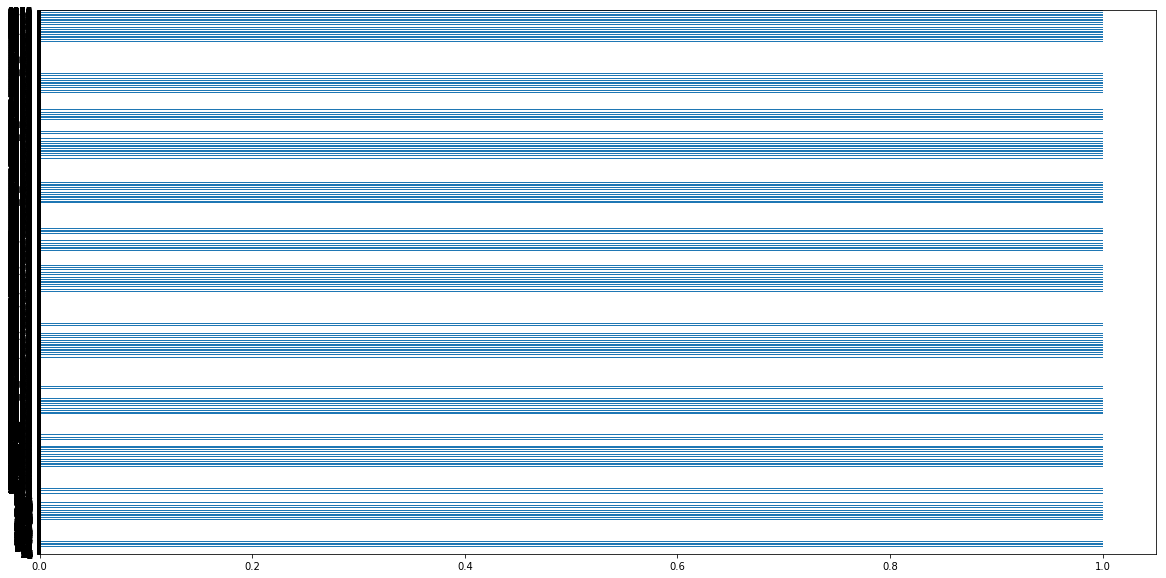

In [39]:
gender.plot(kind='barh', figsize=(20,10));

In [0]:
ddf = dd.from_pandas(df, npartitions=1)


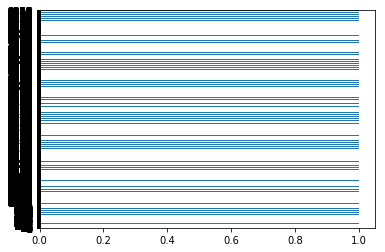

In [51]:
df2 = df['gender'].plot(kind='barh');


In [0]:
import dask.dataframe as dd
from dask.distributed import Client

In [52]:
df2.compute()

AttributeError: ignored

In [83]:
import dask.dataframe as dd
%time
df = dd.read_csv('CausesOfDeath_France_2001-2008.csv')



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [84]:
%time
ddf = pd.read_csv('CausesOfDeath_France_2001-2008.csv')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


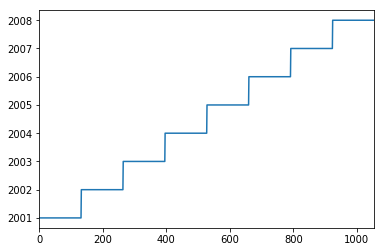

In [81]:
%time
ddf['TIME'].plot();

In [86]:
%time
df['TIME'].value_counts().compute()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


2008    132
2007    132
2006    132
2005    132
2004    132
2003    132
2002    132
2001    132
Name: TIME, dtype: int64

In [87]:
%time
ddf['TIME'].value_counts()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


2008    132
2007    132
2006    132
2005    132
2004    132
2003    132
2002    132
2001    132
Name: TIME, dtype: int64